## Deep Learning With Tensor Flow 1 (CSE 3793)
## ASSIGNMENT-2: NEURAL NETWORK FOR REGRESSION AND CLASSIFICATION


#### Name:Tribhuwan Singh 
#### Reg. No.: 2341019538
#### Section:23412C3
#### Serial No.: 46

### Q1 Write a Python code to build a TensorFlow-Keras model (Sequential API) to implement a singlelayered perceptron (one Dense unit) that predicts house price from area

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

In [ ]:
#genrate a random data
np.random.seed(0)
area = 2.5*np.random.randn(200)+25
price=25* area+5+np.random.randint(20,50, size = len(area))

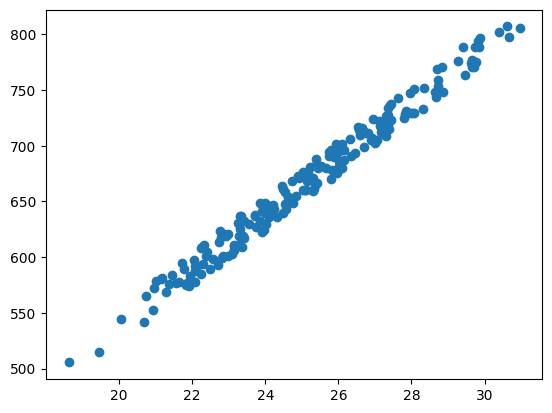

In [ ]:
#2 coverting the dataframe
data = np.array([area,price])
data = pd.DataFrame(data = data.T, columns = ['area','price'])
plt.scatter(data['area'],data['price'])
plt.show()

In [ ]:
#3.Data normalization using min-max
data = (data-data.min())/(data.max()-data.min())#Normalise

In [ ]:
#model bulding
model = K.Sequential([
    Dense(1,input_shape = [1,],activation=None)
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Model training by defining the loss function
model.compile(loss='mean_squared_error',optimizer="sgd")
model.fit(x=data['area'],y=data['price'],epochs=100,batch_size=32,verbose=1,validation_split=0.2)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 1.4407 - val_loss: 1.0656
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1513 - val_loss: 0.8360
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8323 - val_loss: 0.6605
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6506 - val_loss: 0.5266
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5523 - val_loss: 0.4248
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4436 - val_loss: 0.3472
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3995 - val_loss: 0.2884
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3055 - val_loss: 0.2435
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2382 - val_loss: 0.2094
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2273 - val_loss: 0.1838
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2153 - val_loss: 0.1644
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1778 - val_lo

In [ ]:
#predicted output
y_pred = model.predict(data['area'])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


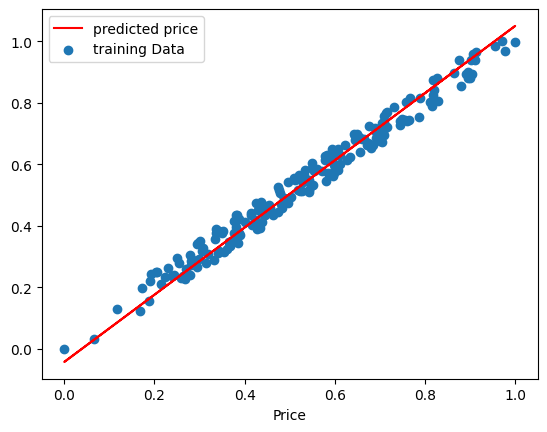

In [ ]:
#6plot the actual and prediction value
plt.plot(data['area'],y_pred,color='red',label="predicted price")
plt.scatter(data['area'],data['price'],label="training Data")
plt.xlabel("Area")
plt.xlabel("Price")
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense,Normalization
import seaborn as sns


### Q2 Write a Python code to build a regression model in TensorFlow–Keras to predict MPG (fuel efficiency) from the UCI Auto MPG dataset using: Keras Normalization layer for input standardization
(mean 0, std 1), a feed-forward network with two hidden layers (ReLU), and Adam optimizer and
MSE loss.

In [ ]:
!wget https://archive.ics.uci.edu/static/public/9/auto+mpg.zip

--2025-10-22 08:45:51--  https://archive.ics.uci.edu/static/public/9/auto+mpg.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘auto+mpg.zip’

auto+mpg.zip            [ <=>                ]  14.52K  --.-KB/s    in 0.05s   

2025-10-22 08:45:52 (297 KB/s) - ‘auto+mpg.zip’ saved [14873]



In [ ]:
import zipfile
with zipfile.ZipFile('auto+mpg.zip', 'r') as zip_ref:
    zip_ref.extractall('auto_mpg')
!ls auto_mpg
import pandas as pd
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
data = pd.read_csv('/content/auto-mpg.data', names=column_names, na_values = "?", comment='\t',sep=" ", skipinitialspace=True)
data.head()

auto-mpg.data  auto-mpg.data-original  auto-mpg.names  Index


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
#Drop Column
data = data.drop('Origin',axis=1)
print(data.isna().sum())
data = data.dropna()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
dtype: int64


In [ ]:
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset= data.drop(train_dataset.index)

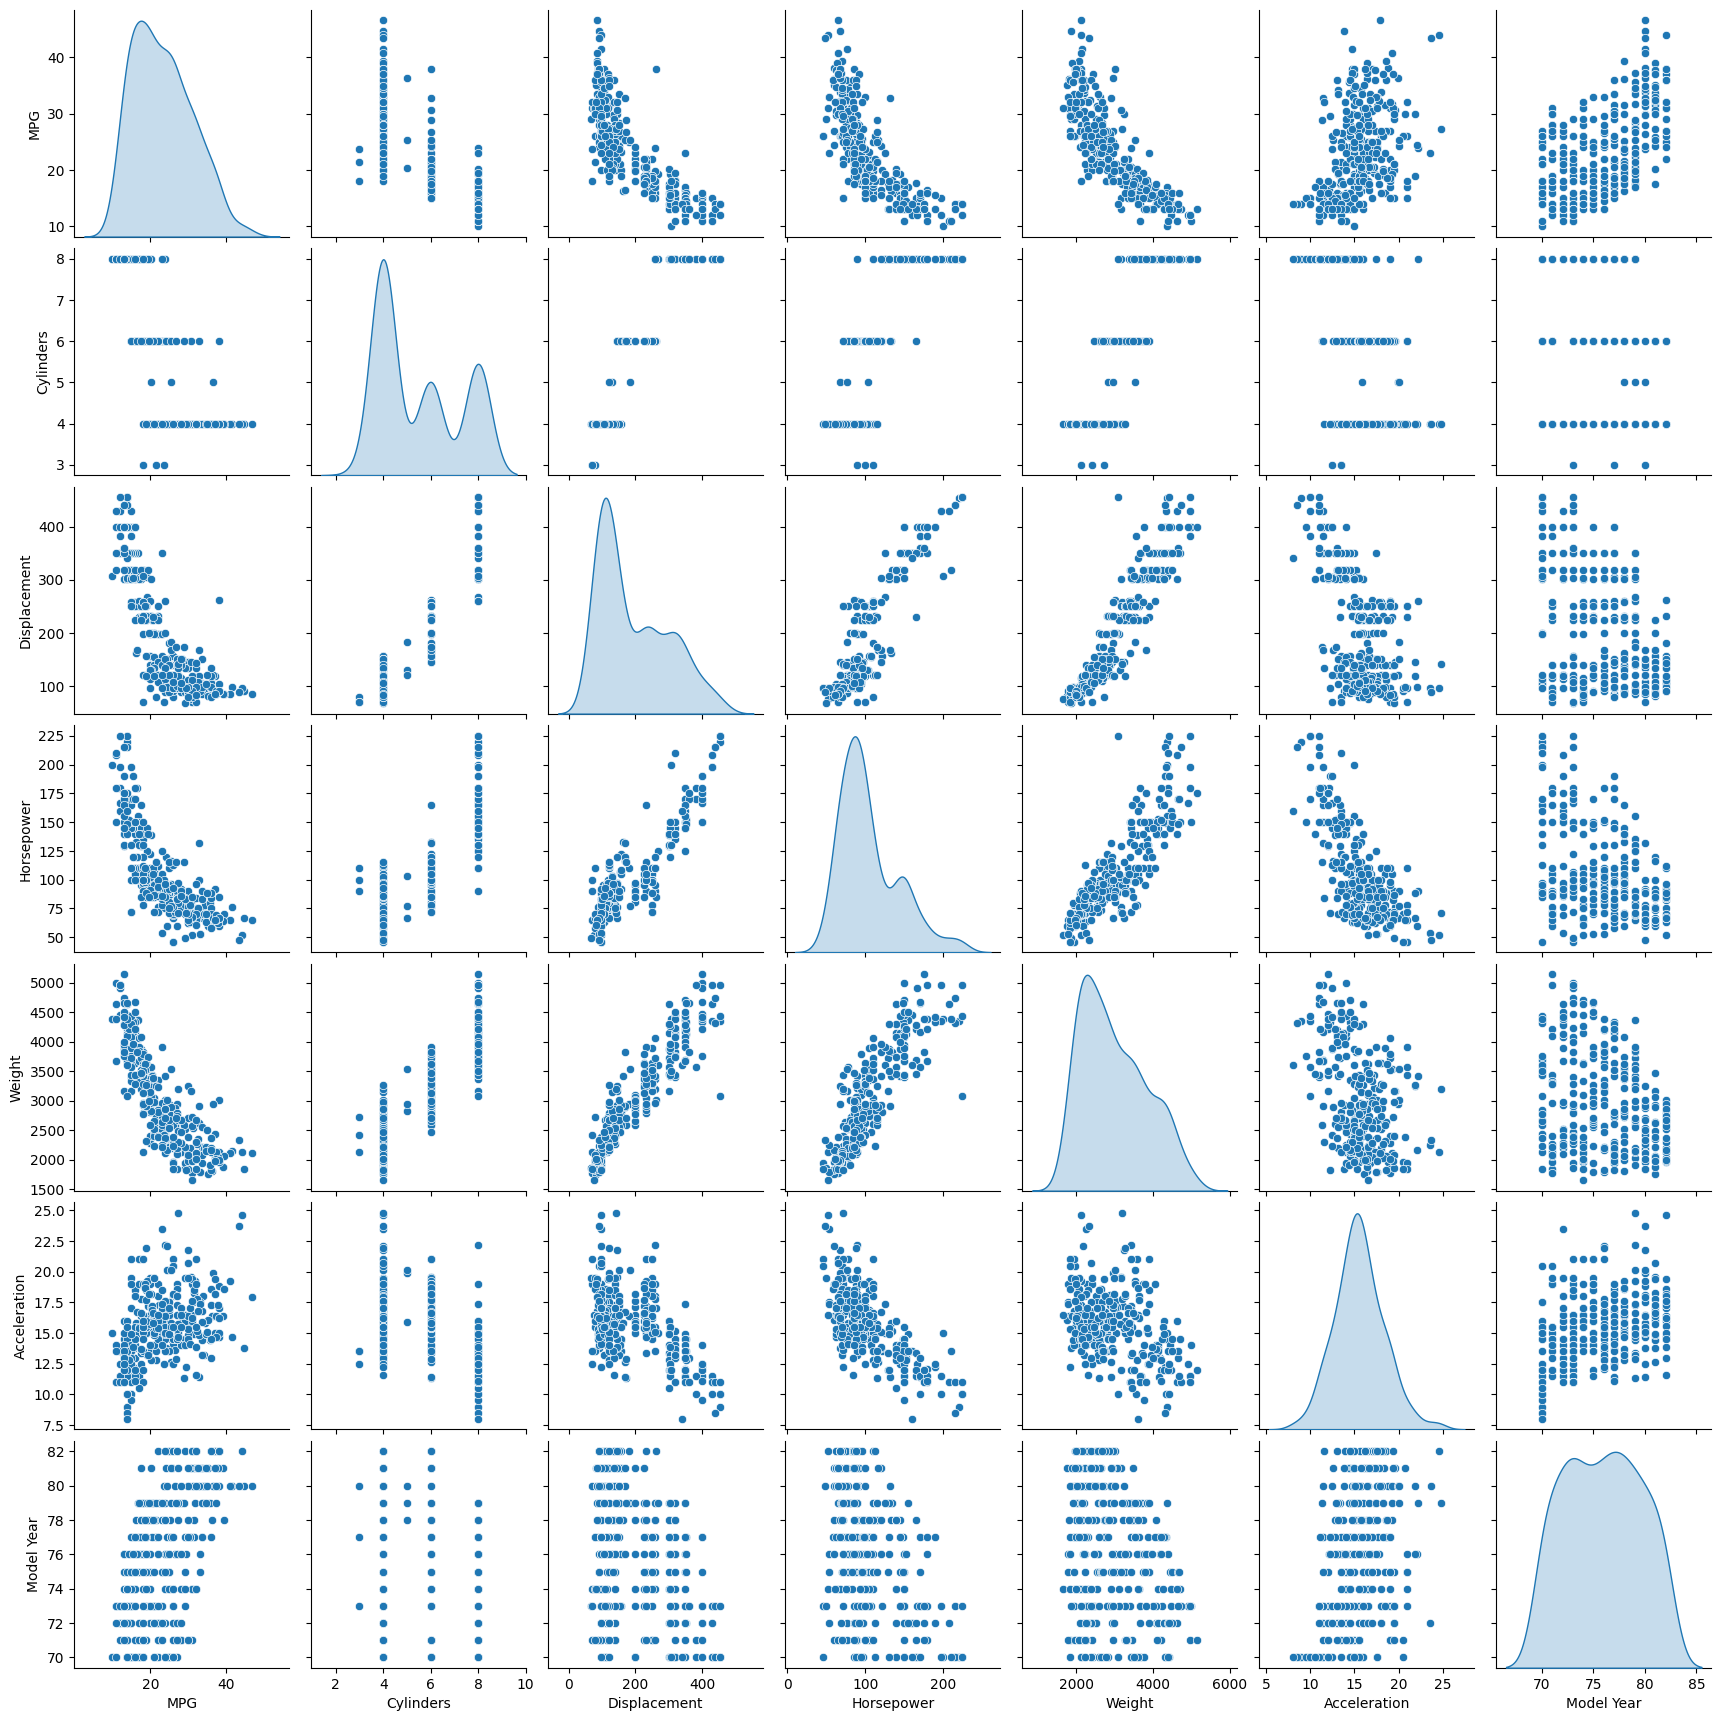

In [ ]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year']],diag_kind='kde')

In [ ]:
train_features= train_dataset.copy()
test_features=test_dataset.copy()
train_labels=train_features.pop('MPG')
test_labels=test_features.pop('MPG')

In [ ]:
data_normalizer=Normalization(axis=-1)
data_normalizer.adapt(np.array(train_features))

In [ ]:
#model bulding
model=K.Sequential([
    data_normalizer,
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1, activation=None)
])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (314, 6)               │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

In [ ]:
#model_training
model.compile(optimizer='adam',loss='mean_absolute_error')
history=model.fit(x=train_features,y=train_labels,epochs=200,batch_size=32,verbose=1,validation_split=0.2)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 22.8138 - val_loss: 23.4193
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.7533 - val_loss: 23.0371
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.6858 - val_loss: 22.6182
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.6232 - val_loss: 22.1297
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.6311 - val_loss: 21.5388
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.8629 - val_loss: 20.8094
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.4914 - val_loss: 19.9096
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.0575 - val_loss: 18.9426
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.6693 - val_loss: 18.1482
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.3912 - val_loss: 17.4484
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.1129 - val_loss: 16.6749
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step -

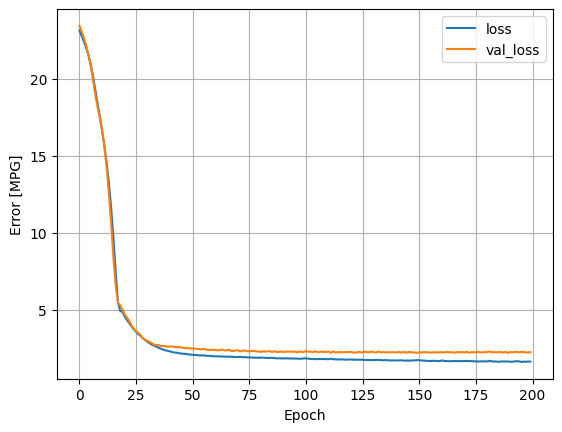

In [ ]:
#plot
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Text(0, 0.5, 'Predictions [MPG]')

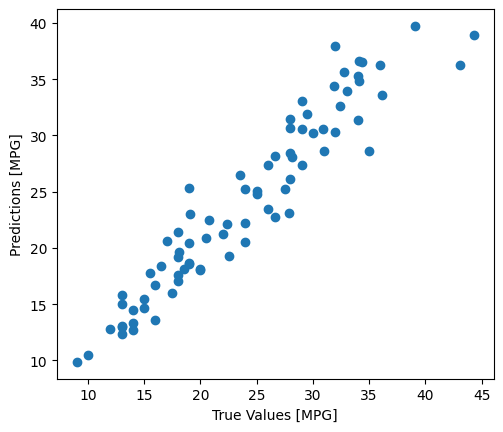

In [ ]:
#predict
y_pred=model.predict(test_features).flatten()
a=plt.axes(aspect='equal')
plt.scatter(test_labels,y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')

### Q3 Write a Python code to build a logistic regression classifier for MNIST digits using TensorFlow–Keras.

In [ ]:
((train_data, train_labels),(test_data, test_labels)) =tf.keras.datasets.mnist.load_data()

In [ ]:
train_data = train_data/np.float32(255)
train_labels =train_labels.astype(np.int32)
test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)

In [ ]:
model = K.Sequential([
    K.layers.Flatten(input_shape=[28,28]),
    Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history= model.fit(train_data,train_labels,epochs=50,verbose=1,validation_split =0.2)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7919 - loss: 0.8051 - val_accuracy: 0.9126 - val_loss: 0.3181
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9095 - loss: 0.3325 - val_accuracy: 0.9204 - val_loss: 0.2880
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9182 - loss: 0.2955 - val_accuracy: 0.9215 - val_loss: 0.2785
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9209 - loss: 0.2847 - val_accuracy: 0.9264 - val_loss: 0.2706
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9229 - loss: 0.2739 - val_accuracy: 0.9254 - val_loss: 0.2689
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9255 - loss: 0.2660 - val_accuracy: 0.9264 - val_loss: 0.2673
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9270 - loss: 0.2621 - val_accuracy: 0.9256 - val_loss: 0.2698
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9261 - loss: 0.2610 - val_accurac

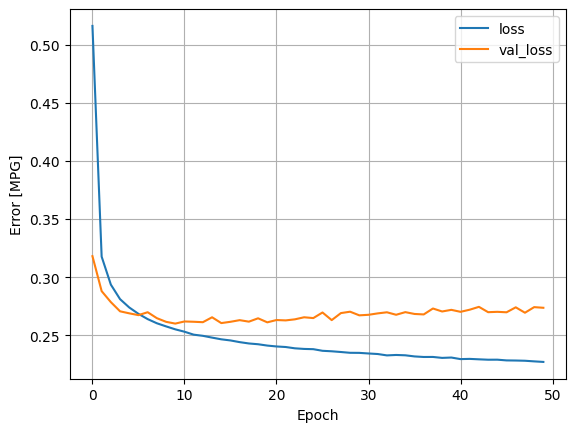

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  true_label,img = true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    plt.xlabel("Pred {} Conf:{:2.0f}% True({})".format(predicted_label,100*np.max(predictions_array),true_label),color=color)
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


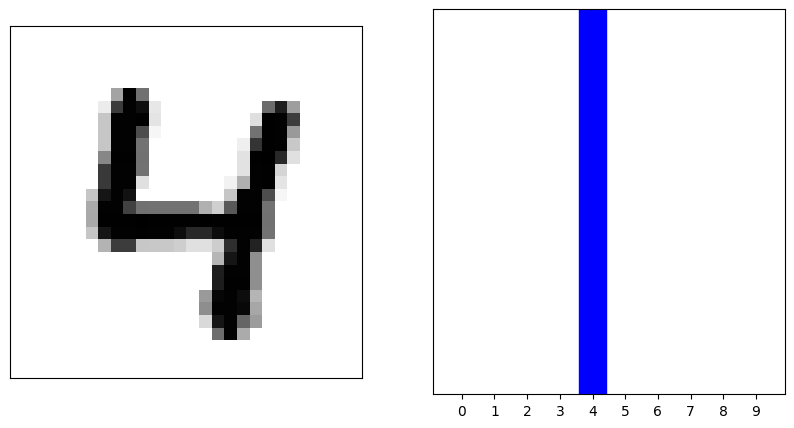

In [ ]:
predictions = model.predict(test_data)
i = 56
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i , predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

In [ ]:
model = K.Sequential([
    K.layers.Flatten(input_shape=[28,28]),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history= model.fit(train_data,train_labels,epochs=50,verbose=1,validation_split =0.2)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8716 - loss: 0.4684 - val_accuracy: 0.9538 - val_loss: 0.1663
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9594 - loss: 0.1373 - val_accuracy: 0.9658 - val_loss: 0.1178
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9744 - loss: 0.0897 - val_accuracy: 0.9677 - val_loss: 0.1087
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9790 - loss: 0.0696 - val_accuracy: 0.9728 - val_loss: 0.0927
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9838 - loss: 0.0521 - val_accuracy: 0.9743 - val_loss: 0.0895
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9890 - loss: 0.0378 - val_accuracy: 0.9746 - val_loss: 0.0873
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9924 - loss: 0.0271 - val_accuracy: 0.9741 - val_loss: 0.0882
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9930 - loss: 0.0232 - val_accura

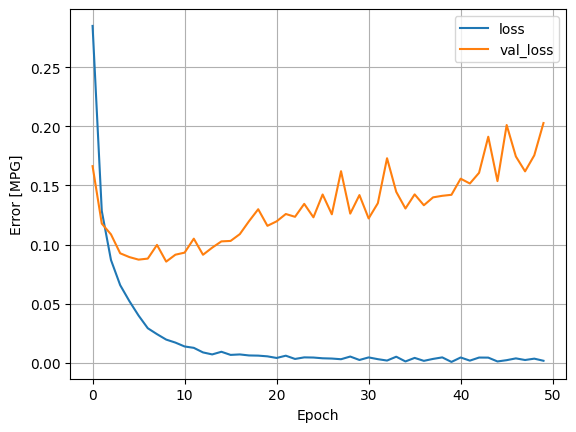

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)